# SI370: Working with Time



We are going to import most of the usual packages, as well as a few
that are specific to manipulating dates and time.

In [161]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.graphics as smg
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from pandas import Series
sns.set(style='white', color_codes=True, font_scale=1.3)

# make the Pandas tables a little more readable
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [117]:
# read in stocks file
# convert the string that corresponds to date into datetime
# the first column (date) to be the index
df_stock = pd.read_csv('stocks.csv',parse_dates=True,index_col=0)
msft = df_stock.MSFT  # a series of MSFT stock

In [113]:
df_stock.head(1)

,AAPL,MSFT,SPX
Date,,,
2011-01-03,43.838201,24.542705,1271.869995


## The Basics (Time in Python)

In [4]:
# get the current time
now = datetime.now()

In [5]:
# the current time (at the time that I called datetime.now())
now

datetime.datetime(2018, 11, 26, 11, 4, 23, 652209)

In [6]:
# get current year, but also now.month
now.month

11

In [11]:
# create a datetime in the past 9/27/2015 at 12:00 (midnight)
somedate = datetime(2015,9,27)

In [12]:
somedate

datetime.datetime(2015, 9, 27, 0, 0)

In [13]:
# compare the times
delta = now - somedate

In [14]:
# first thing days, seconds, nanos  (days + seconds + nanos)
delta

datetime.timedelta(1156, 39863, 652209)

In [15]:
# just converting to string
str(now)

'2018-11-26 11:04:23.652209'

## convert from strings to datetime objects

In [16]:
# read the string and give you back a datetime object
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
# MM/DD/YY
parse('6/12/11')

datetime.datetime(2011, 6, 12, 0, 0)

In [18]:
# for European style  DD/MM/YY
parse('12/6/2011',dayfirst=True) 

datetime.datetime(2011, 6, 12, 0, 0)

In [19]:
# weird formats
date = parse("4th of July, 2015")

In [20]:
str(date)

'2015-07-04 00:00:00'

In [21]:
# controlling pretty printing
date.strftime('%d')

# http://strftime.org/
# d, c, A

'04'

### Q1: Write code using datetime to generate: the output "2nd of June, 2011 at 8 pm"

In [22]:
## WORKSHEET EXERCISE
dt = datetime(2011, 6, 2, 20, 0)

# get it to print "2nd of June, 2011 at 8 pm"
dt.strftime('%-dnd of %B, %Y at %-I %p')

'2nd of June, 2011 at 8 PM'

# Numpy Dates

numpy has some built-in date functionality that we might find useful.  For example, it's east to create a range of dates:

In [26]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [27]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [28]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

## Generating a series of time

Let's generate a list of datetime objects:

In [29]:
dates = [datetime(2011,1,1),datetime(2011,1,2),
         datetime(2011,1,3),datetime(2011,1,4),
         datetime(2011,1,5)]

In [30]:
dates

[datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 3, 0, 0),
 datetime.datetime(2011, 1, 4, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0)]

And now let's create a series of 5 random numbers and use the list of datetime objects as the index:


In [31]:
ts = Series(np.random.randn(5),index=dates)
ts

2011-01-01   -1.059352
2011-01-02    0.839996
2011-01-03   -0.613554
2011-01-04   -0.727840
2011-01-05    1.510024
dtype: float64

In [32]:
# give me the first value
ts[0]

-1.0593522567261193

In [34]:
# get a range from 2nd to 5th
ts[2:5]

2011-01-03   -0.613554
2011-01-04   -0.727840
2011-01-05    1.510024
dtype: float64

In [35]:
# give me the data for 1/3/2011
ts['2011-01-03']

-0.613553771411154

In [36]:
# will also work
ts['1/3/2011']

-0.613553771411154

In [37]:
# range
ts['1/1/2011':'1/3/2011']

2011-01-01   -1.059352
2011-01-02    0.839996
2011-01-03   -0.613554
dtype: float64

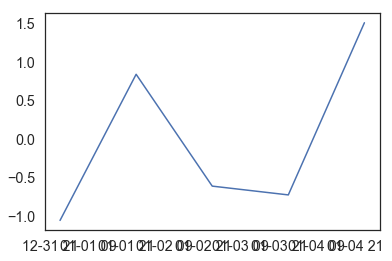

In [38]:
# show me the time series
plt.plot(ts)

## Math with Dates

In [47]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [48]:
# find the diff to the first day
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

# Making Ranges

In [49]:
# make a range between 7/3/2015 and 7/10/2015
pd.date_range('2015-07-03','2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [50]:
# make a range starting at 7/3/2015
# for 8 days
pd.date_range('2015-07-03',periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

### Q2: Make a range starting at 7/3/2018 for 8 days but at hour granularity

In [84]:

pd.date_range(start='2018-07-03',end='2018-07-11',freq='H')

DatetimeIndex(['2018-07-03 00:00:00', '2018-07-03 01:00:00',
               '2018-07-03 02:00:00', '2018-07-03 03:00:00',
               '2018-07-03 04:00:00', '2018-07-03 05:00:00',
               '2018-07-03 06:00:00', '2018-07-03 07:00:00',
               '2018-07-03 08:00:00', '2018-07-03 09:00:00',
               ...
               '2018-07-10 15:00:00', '2018-07-10 16:00:00',
               '2018-07-10 17:00:00', '2018-07-10 18:00:00',
               '2018-07-10 19:00:00', '2018-07-10 20:00:00',
               '2018-07-10 21:00:00', '2018-07-10 22:00:00',
               '2018-07-10 23:00:00', '2018-07-11 00:00:00'],
              dtype='datetime64[ns]', length=193, freq='H')

# resampling data (dates)

In [85]:
# make the index the dates, create random data
ts = Series(np.random.randn(5),index=dates)  
ts

2015-07-03    0.163140
2015-07-04   -1.066303
2015-07-06   -0.773367
2015-07-07    0.866717
2015-07-08   -0.959658
dtype: float64

In [86]:
# resample by H --> H is hours
x = ts.resample('H').sum()
x.head()

2015-07-03 00:00:00    0.16314
2015-07-03 01:00:00    0.00000
2015-07-03 02:00:00    0.00000
2015-07-03 03:00:00    0.00000
2015-07-03 04:00:00    0.00000
Freq: H, dtype: float64

In [87]:
# resample by 6H --> H is hours and 6 is multiplier
ts2 = ts.resample('6H').sum()
ts2.head()

2015-07-03 00:00:00    0.163140
2015-07-03 06:00:00    0.000000
2015-07-03 12:00:00    0.000000
2015-07-03 18:00:00    0.000000
2015-07-04 00:00:00   -1.066303
Freq: 6H, dtype: float64

In [88]:
# fill in missing data by pushing data forward
ts2 = ts2.fillna(method='ffill')  # bfill
ts2.head(10)

2015-07-03 00:00:00    0.163140
2015-07-03 06:00:00    0.000000
2015-07-03 12:00:00    0.000000
2015-07-03 18:00:00    0.000000
2015-07-04 00:00:00   -1.066303
2015-07-04 06:00:00    0.000000
2015-07-04 12:00:00    0.000000
2015-07-04 18:00:00    0.000000
2015-07-05 00:00:00    0.000000
2015-07-05 06:00:00    0.000000
Freq: 6H, dtype: float64

In [89]:
# missing data in series, practical example
data = msft.iloc[:10]
data

Date
2011-01-03    24.542705
2011-01-04    24.639192
2011-01-05    24.560248
2011-01-06    25.279513
2011-01-07    25.086540
2011-01-08    25.086540
2011-01-09    25.086540
2011-01-10    24.753221
2011-01-11    24.656736
2011-01-12    25.042681
Freq: D, Name: MSFT, dtype: float64

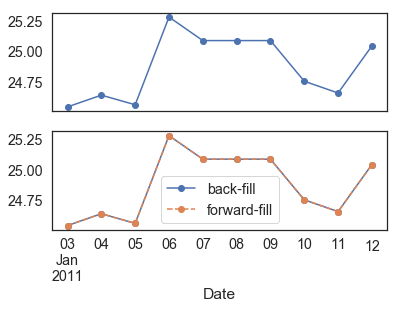

In [90]:
fig, ax = plt.subplots(2, sharex=True)

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

# Shift in time

In [91]:
# date_range as a helper function
indx = pd.date_range('4/1/2012','6/1/2012')  # make me a date range, over 2 months
indx  # returns by day

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [92]:
# look at the bottom of object, see freq='...'  (tells you pattern)

In [93]:
# make a new time series using date_range
ts = Series(abs(np.random.randn(4)),
            index=pd.date_range('1/1/2000',periods=4,freq='M'))
# np.random.randn(4)  --> 4 random numbers
# abs(...)  made them all >= 0  (absolute value)
# index --> key for series
# date range --> start at 1/1/2000, give me 5 months

In [94]:
ts

2000-01-31    0.098456
2000-02-29    1.115485
2000-03-31    0.844729
2000-04-30    1.263368
Freq: M, dtype: float64

In [95]:
# shifted value (shift by 1)
ts.shift(1)

2000-01-31         NaN
2000-02-29    0.098456
2000-03-31    1.115485
2000-04-30    0.844729
Freq: M, dtype: float64

In [96]:
# shift backwards
ts.shift(-2)

2000-01-31    0.844729
2000-02-29    1.263368
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [97]:
# calculate ratio
ts / ts.shift(1)

2000-01-31          NaN
2000-02-29    11.329766
2000-03-31     0.757275
2000-04-30     1.495590
Freq: M, dtype: float64

### Q3: What's the code to calculate (day-over-day) percent change?

In [98]:
# calculate percent change 
(ts - ts.shift(-1))/ts

2000-01-31   -10.329766
2000-02-29     0.242725
2000-03-31    -0.495590
2000-04-30          NaN
Freq: M, dtype: float64

## Shifting time

In [99]:
# shift time
ts

2000-01-31    0.098456
2000-02-29    1.115485
2000-03-31    0.844729
2000-04-30    1.263368
Freq: M, dtype: float64

In [100]:
ts.tshift(1)   # tshift shifts the index

2000-02-29    0.098456
2000-03-31    1.115485
2000-04-30    0.844729
2000-05-31    1.263368
Freq: M, dtype: float64

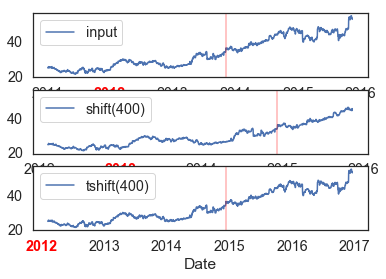

In [101]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
msft = msft.asfreq('D', method='pad')

msft.plot(ax=ax[0])
msft.shift(400).plot(ax=ax[1])
msft.tshift(400).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2013-11-05')
offset = pd.Timedelta(400, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(400)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(400)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

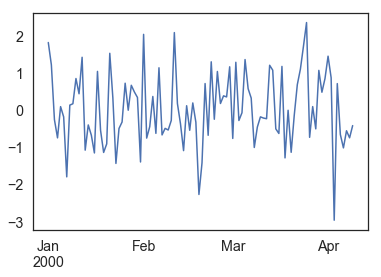

In [102]:
# make a larger time series
# give me 100 days staring at 1/1/2000
rng = pd.period_range('1/1/2000',periods=100,freq='D')  
ts = Series(np.random.randn(len(rng)),index=rng)
ts.plot()

### Q4: Create a new times series from the above time series that uses the .resample() method to calculate the mean monthly values.  Plot the results.

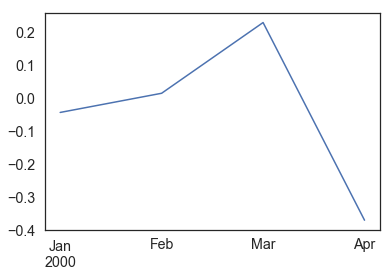

In [103]:
xmm = ts.resample('M').mean()
xmm.plot()

### Q5: Which month has the highest mean value and what is the value?

In [104]:
# find max value in that month
xmm.max()

0.2297382525965643

# Working with data frames

In [105]:
df_stock.head(10)

,AAPL,MSFT,SPX
Date,,,
2011-01-03,43.838201,24.542705,1271.869995
2011-01-04,44.066990,24.639192,1270.199951
2011-01-05,44.427464,24.560248,1276.560059
2011-01-06,44.391547,25.279513,1273.849976
2011-01-07,44.709458,25.086540,1271.500000
2011-01-10,45.551451,24.753221,1269.750000
2011-01-11,45.443707,24.656736,1274.479980
2011-01-12,45.813494,25.042681,1285.959961
2011-01-13,45.981095,24.726908,1283.760010


In [111]:
type(df_stock.index)

pandas.core.indexes.period.PeriodIndex

In [ ]:
df_stock.t

In [118]:
# B is telling pandas that we are working with business days
df_stock = df_stock.to_period(freq='B')  

In [119]:
df_stock[['AAPL','MSFT']]   # select apple and microsft


,AAPL,MSFT
Date,,
2011-01-03,43.838201,24.542705
2011-01-04,44.066990,24.639192
2011-01-05,44.427464,24.560248
2011-01-06,44.391547,25.279513
2011-01-07,44.709458,25.086540
2011-01-10,45.551451,24.753221
2011-01-11,45.443707,24.656736
2011-01-12,45.813494,25.042681
2011-01-13,45.981095,24.726908


In [120]:
# Resampling two ways - resample() is an aggregation
# asfreq() is selection
print('On 12/30/2011, msft was at:', msft['2011-12-30'])


On 12/30/2011, msft was at: 23.375811


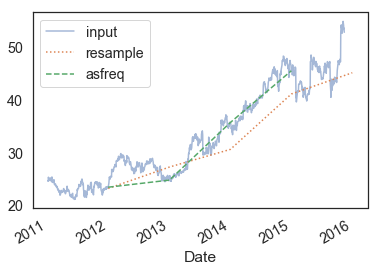

In [121]:
msft.plot(alpha=0.5, style='-')
msft.resample('BA').mean().plot(style=':')  
msft.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [122]:
# rolling data (mean over time)


In [123]:
data = pd.DataFrame({'input': msft
                    })
data['m'] = data.rolling(window=5).mean()

#data['m2'] = data.rolling(window=5).std()
data[500:900]

,input,m
Date,,
2012-12-28,24.583196,24.977639
2012-12-31,24.731343,24.840602
2013-01-02,25.573933,24.944306
2013-01-03,25.231341,25.016527
2013-01-04,24.759122,24.975787
2013-01-07,24.712826,25.001713
2013-01-08,24.583196,24.972084
2013-01-09,24.722086,24.801714
2013-01-10,24.499863,24.655419


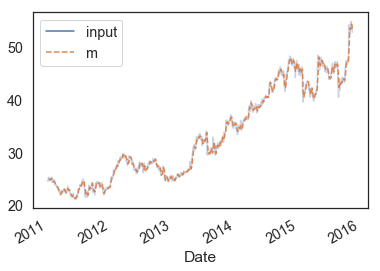

In [124]:
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

### Playing with moving averages

* Rolling - only take into account a window
* Expanding - take into account everything before
* Exponential Weighting - weight today more than yesterday
  and yesterday more than day before

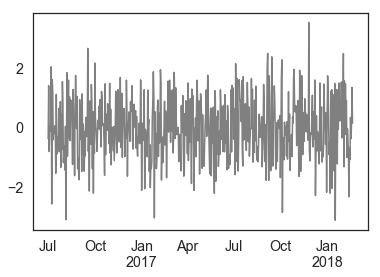

In [125]:
# make play dataset
rtest = pd.DataFrame(np.random.randn(600, 1), 
                  index = pd.date_range('7/1/2016', 
                                        freq = 'D', periods = 600), 
                  columns = ['A'])
rtest['A'].plot(color='gray')

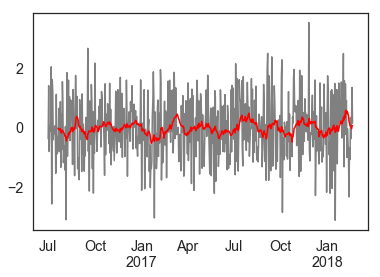

In [126]:
# r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, 
# r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
# consider 20 "units" back (days in this case)
r = rtest.rolling(window=20)
rtest.A.plot(color='gray')
r.mean()['A'].plot(color='red')
#r['A'].agg(['median','mean']).plot()

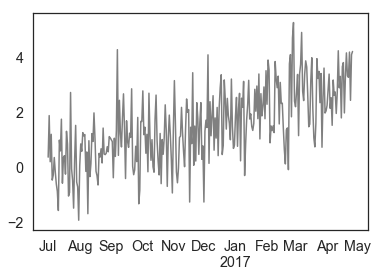

In [127]:
# time series with a trend
rtest = pd.DataFrame(np.random.randn(300)+np.arange(300)*.01, 
                  index = pd.date_range('7/1/2016', 
                                        freq = 'D', periods = 300), 
                  columns = ['A'])
rtest['A'].plot(color='gray')

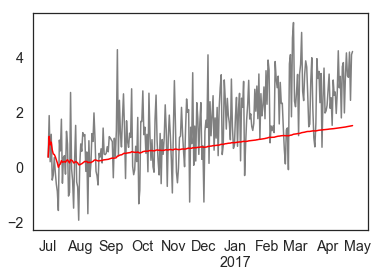

In [128]:
# an expanding moving average
re = rtest.expanding(1)
rtest['A'].plot(color='gray')
re.mean()['A'].plot(color='red')

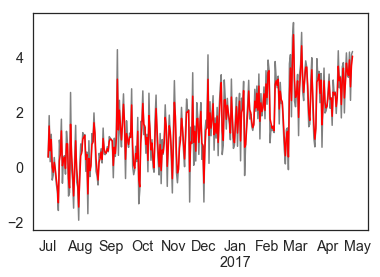

In [129]:
# exponential, com=.5 is how much decay
# see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.ewm.html
re = rtest.ewm(com=.5)
rtest['A'].plot(color='gray')
re.mean()['A'].plot(color='red')

### Qx: Do this for the Microsoft data (remember, it's in the msft variable)

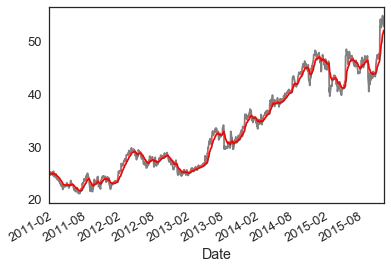

In [72]:
# do this for microsoft
# WORKSHEET ACTIVITY
# calculate the windows (rolling, expanding, exp)
# describe what happens when you increase the value of com
re = msft.ewm(com=10)
msft.plot(color='gray')
re.mean().plot(color='red')


# Seasons + Auto-Correlation

In [130]:
# correlation
# generate 365 fake numbers
d1 = np.random.random(365)
# copy
d2 = d1.copy()                

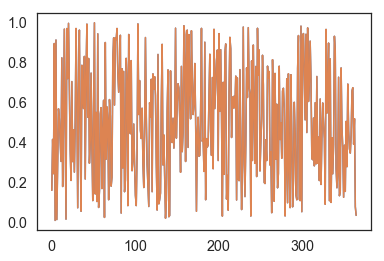

In [131]:
plt.plot(d1)
plt.plot(d2)

In [132]:
# calculate the correlations
np.corrcoef(d1,d2)

array([[1., 1.],
       [1., 1.]])

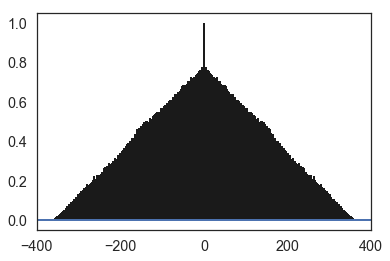

In [133]:
# calculate xcorr (shifts one timeseries relative to the other)
_ = plt.xcorr(d1,d2,usevlines=True,maxlags=None,normed=True,lw=2)
# calculate cross correlation between d1 and d2
# maxlags --> how many lags should I try?  None --> all, 20 --> -20 to 20
# normed --> normalize
# lw = line width

In [134]:
# correlation
d1 = np.random.random(365)    # generate 365 fake numbers
d2 = d1.copy()                # copy
for i in range(30):           # insert .2, 30 times at start of d3
    d2 = np.insert(d2,0,0.2)
d2 = d2[0:365]                # cut d2 so that it's back to 365 number

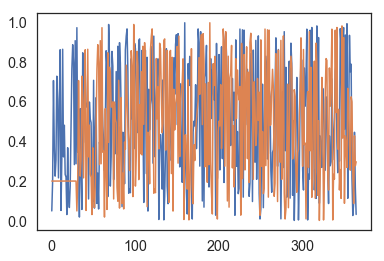

In [135]:
plt.plot(d1)
plt.plot(d2)

In [136]:
# calculate the correlation
np.corrcoef(d1,d2)

array([[1.        , 0.05434104],
       [0.05434104, 1.        ]])

In [137]:
# bad correlation due to shift
# if we shift back we have a correlation of 1
np.corrcoef(d1[0:335],d2[30:365])

array([[1., 1.],
       [1., 1.]])

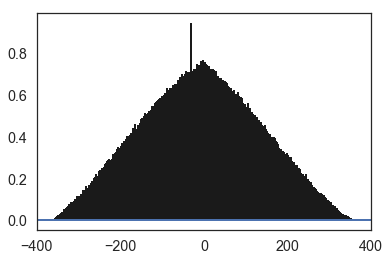

In [138]:
# what does this look like with xcorr?
_ = plt.xcorr(d1,d2,usevlines=True,maxlags=None,normed=True,lw=2)
# calculate cross correlation between d1 and d2
# maxlags --> how many lags should I try?  None --> all, 20 --> -20 to 20
# normed --> normalize
# lw = line width

# Let's Get Fancy

In [139]:
df_trend = pd.read_csv('googletrends.csv',parse_dates=True, index_col=0)
df_trend = df_trend.to_period('W-SAT')  # convert so that times are based on periods of weeks ending on saturday

In [140]:
df_trend.head(5)

,turkey,iphone,santa,FIFA,beer
Week,,,,,
2004-01-04/2004-01-10,11,0,34,6,72
2004-01-11/2004-01-17,11,0,35,5,70
2004-01-18/2004-01-24,9,0,34,5,72
2004-01-25/2004-01-31,11,0,33,5,76
2004-02-01/2004-02-07,10,0,33,4,74


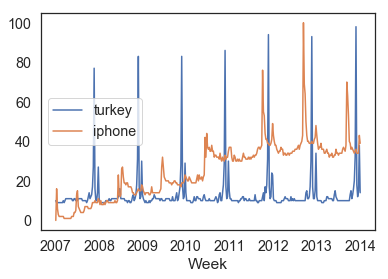

In [146]:
# grab all data from 2007 to 2013
# grab the turkey and iphone time series
# plot them
df_trend.loc['2007':'2013',['turkey','iphone']].plot()

In [147]:
ts_santa = df_trend.loc['2007':'2013','santa'].to_timestamp()
ts_fifa = df_trend.loc['2007':'2013','FIFA'].to_timestamp()
ts_beer = df_trend.loc['2007':'2013','beer'].to_timestamp()
ts_iphone = df_trend.loc['2007':'2013','iphone'].to_timestamp()
ts_turkey = df_trend.loc['2007':'2013','turkey'].to_timestamp()

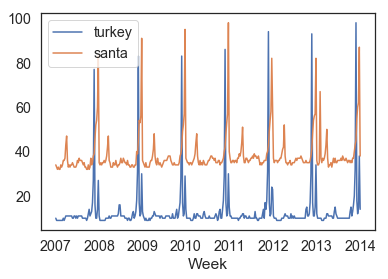

In [148]:
df_trend.loc['2007':'2013',['turkey','santa']].plot()
# grabbing all data from 2007 to 2013
# grabbing the turkey and iphone time series
# plotting them

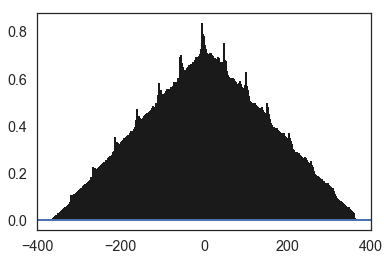

In [149]:
#np.array(ts_santa.values)
_ = plt.xcorr(ts_turkey.values.astype(float),ts_santa.values.astype(float),
              usevlines=True,maxlags=None,normed=True,lw=2)

Text(0.5,1,'Cross Correlation: "santa" vs. "turkey"')

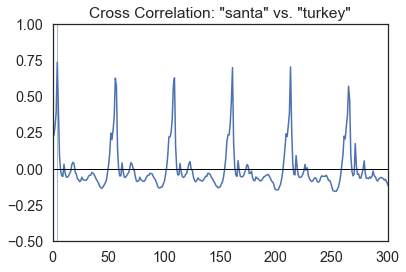

In [150]:
# Cross correlation between "santa" and "turkey"
ccf = sm.tsa.stattools.ccf(ts_santa['2007':'2013'], ts_turkey['2007':'2013'])

plt.plot(ccf)
plt.xlim(0,300)
plt.ylim(-0.5, 1)
plt.axvline(4, linewidth=0.5)
plt.axhline(0, color="black", linewidth=1)
plt.title('Cross Correlation: "santa" vs. "turkey"')

### Qx: What does the above plot tell us?

Text(0.5,1,'Cross Correlation: "turkey" vs. white noise')

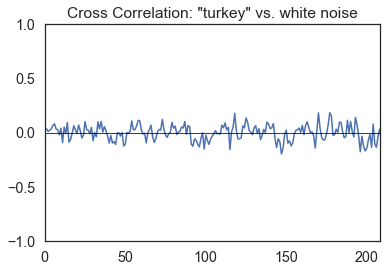

In [151]:
# Cross correlation between "turkey" and white noise
white_noise = np.random.randn(len(ts_turkey))
ccf = sm.tsa.stattools.ccf(ts_turkey, white_noise)

plt.plot(ccf)
plt.xlim(0,208)
plt.ylim(-1,1)
plt.axhline(0, color="black", linewidth=0.75)
plt.title('Cross Correlation: "turkey" vs. white noise')

### Qx: Use the code below to find the cross correlation between beer and FIFA.  What does this tell us?

Text(0.5,1,'Cross Correlation: "fifa" vs. "beer"')

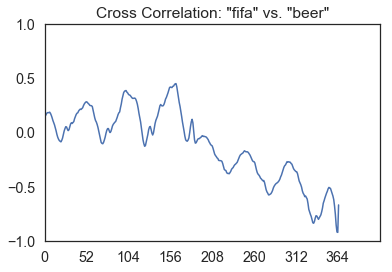

In [153]:
ccf = sm.tsa.stattools.ccf(ts_beer, ts_fifa)

plt.plot(ccf)
plt.xlim(0,52*8)
plt.ylim(-1,1)
plt.xticks(range(0,52*8,52))
plt.title('Cross Correlation: "fifa" vs. "beer"')

### Autocorrelation

A measure of the correlation between the the timeseries with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

Text(0.5,1,"Autocorrelation for 'turkey'")

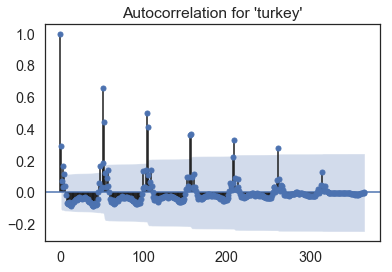

In [154]:
# Plot autocorrelation function (ACF) of the data of "turkey".
fig, ax = plt.subplots()
smg.tsaplots.plot_acf(ts_turkey,ax=ax)
plt.title("Autocorrelation for 'turkey'")

In [155]:
# Zoom in


Text(0.5,1,'Autocorrelation for white-noise')

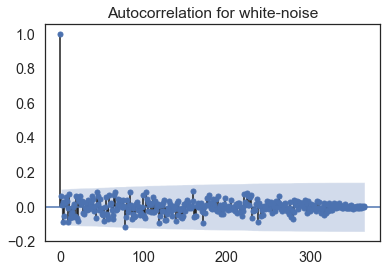

In [156]:
# Plot ACF of an array of white noise
fig, ax = plt.subplots()
smg.tsaplots.plot_acf(white_noise,ax=ax)
plt.title("Autocorrelation for white-noise")

## Seasonality

See http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html for more details.

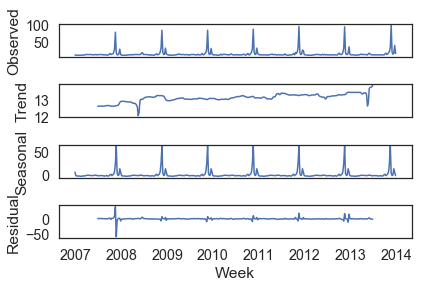

In [160]:
# ^ grabbed the time series for turkey from 2007 to 2013
decompose_result = sm.tsa.seasonal_decompose(ts_turkey)
# ^ decompose into seasonal and trend and residual data
_ = decompose_result.plot()

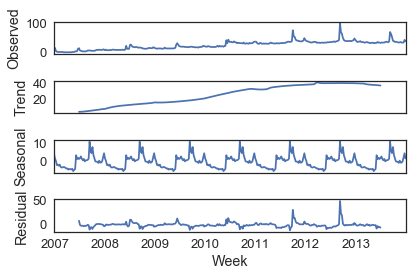

In [108]:
# ^ grabbed the time series for iphones from 2007 to 2013
decompose_result = sm.tsa.seasonal_decompose(ts_iphone)
# ^ decompose into seasonal and trend and residual data
_ = decompose_result.plot()